# MVCNN - Multiple Views Reconstruction

MVCNN pretrained encoder loaded.
Encoder-MVCNN/SVCNN loaded.
Every prim has 2000 points
New MLP decoder : hidden size 512, num_layers 2, activation relu
Decoder-AtlasNet loaded.
Loading Model ...


WARNING - 2022-08-06 23:29:00,769 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model loaded.
Ground Truth PCD path:  stairs_0102.pcd
Ground Truth IMG path:  stairs_0102_v008.png
tensor([[ 0.5630, -0.1738,  0.6874,  4.4823,  2.8821, -4.5859, -5.1198, -1.1216,
          3.2151,  3.2633, -1.1089,  0.9484, -2.3735, -6.4890, -8.9237,  0.1756,
         -5.7203,  1.5607,  4.2187,  0.4543, -1.4216, -8.5017, -5.2456, -5.7188,
         -4.1607, -0.0199,  4.4335, -4.4982, -3.5596,  1.7167, -1.0448, 14.5443,
          0.2009, -2.8335, -0.8700, -4.6537, -1.4275, -9.6462, -7.9362, -2.9096]],
       grad_fn=<AddmmBackward0>)
Label: stairs  Inference: stairs
Good inference.


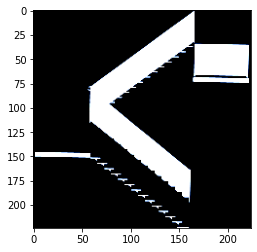

In [185]:
import torch
from hparams import HyperParameter
from model.network import BackboneNetwork
from modelnet40 import ModelNet40AtlasNet
import matplotlib.pyplot as plt
import open3d

ATLAS_TEST = ModelNet40AtlasNet("train", shuffle=False, pcd_normalization="UnitBall",  
                                img_normalization=True, inference= True, mvcnn=True, num_point=2000)

hparams = HyperParameter()
hparams.load('pretrained/model_e_mvcnn.yaml')

model = BackboneNetwork(hparams)
print("Loading Model ...")
model.load_state_dict(torch.load('pretrained/model_e_mvcnn.ckpt'))
print("Model loaded.")
model = model.to(hparams.device)
model.eval()

classnames=['airplane','bathtub','bed','bench','bookshelf','bottle','bowl','car','chair',
                    'cone','cup','curtain','desk','door','dresser','flower_pot','glass_box',
                    'guitar','keyboard','lamp','laptop','mantel','monitor','night_stand',
                    'person','piano','plant','radio','range_hood','sink','sofa','stairs',
                    'stool','table','tent','toilet','tv_stand','vase','wardrobe','xbox']

index = 7899
save = False
visualization = True
classification = True

sample = ATLAS_TEST[index]
print("Ground Truth PCD path: ", sample['pcd_filename'])
print("Ground Truth IMG path: ", sample['img_filename'])

all_renderings = sample['all_renderings'].unsqueeze(0).float().to(hparams.device)

img = sample['all_renderings'][0]
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(model(all_renderings, mvcnn=True).detach().numpy()[0][0].transpose())
mesh = model.generate_mesh(all_renderings, True)

if classification:
    imgs, label = sample['all_renderings'], sample['class']
    tmp = model.class_inference(imgs, mvcnn=True)
    print(tmp)
    tmp = torch.max(tmp, 1)[1]
    
    gt_label, pred_label = label, classnames[int(tmp)]
    print("Label:", gt_label, " Inference:", pred_label)
    if gt_label == pred_label:
        print("Good inference.")
    else:
        print("Bad inference.")
        
if visualization:
    mesh.compute_vertex_normals()
    open3d.visualization.draw_geometries([pcd, mesh])

if save:
    open3d.io.write_point_cloud(f"inference/inference_{index}.pcd", pcd, \
                                write_ascii=True, print_progress=True)
    open3d.io.write_triangle_mesh(f"inference/inference_{index}.obj", mesh, \
                                write_ascii=True, print_progress=True)

SVCNN pretrained encoder loaded.
Encoder-MVCNN/SVCNN loaded.
Every prim has 2000 points
New MLP decoder : hidden size 512, num_layers 2, activation relu
Decoder-AtlasNet loaded.
Loading Model ...
Model loaded.
Ground Truth PCD path:  vase_0053.pcd
Ground Truth IMG path:  vase_0053_v002.png


WARNING - 2022-08-06 22:48:23,283 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: vase  Inference: vase
Good inference.


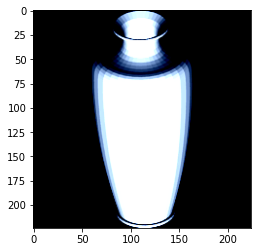

In [180]:
import torch
from hparams import HyperParameter
from model.network import BackboneNetwork
from modelnet40 import ModelNet40AtlasNet
import matplotlib.pyplot as plt
import open3d

ATLAS_TEST = ModelNet40AtlasNet("train", shuffle=False, pcd_normalization="UnitBall",  
                                img_normalization=True, inference= True, mvcnn=True, num_point=2000)

hparams = HyperParameter()
hparams.load('pretrained/model_e_svcnn.yaml')

model = BackboneNetwork(hparams)
print("Loading Model ...")
model.load_state_dict(torch.load('pretrained/model_epoch_149.ckpt'))
print("Model loaded.")
model = model.to(hparams.device)
model.eval()

classnames=['airplane','bathtub','bed','bench','bookshelf','bottle','bowl','car','chair',
                    'cone','cup','curtain','desk','door','dresser','flower_pot','glass_box',
                    'guitar','keyboard','lamp','laptop','mantel','monitor','night_stand',
                    'person','piano','plant','radio','range_hood','sink','sofa','stairs',
                    'stool','table','tent','toilet','tv_stand','vase','wardrobe','xbox']
index = 9230
save = False
visualization = True
classification = True

sample = ATLAS_TEST[index]
print("Ground Truth PCD path: ", sample['pcd_filename'])
print("Ground Truth IMG path: ", sample['img_filename'])

img = sample['rendering']
gt_pcd = sample['pointcloud']
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

input = sample['rendering'].unsqueeze(0).float().to(hparams.device)

if classification:
    imgs, label = input, sample['class']
    tmp = torch.max(model.class_inference(imgs), 1)[1]
    gt_label, pred_label = label, classnames[int(tmp)]
    print("Label:", gt_label, " Inference:", pred_label)
    if gt_label == pred_label:
        print("Good inference.")
    else:
        print("Bad inference.")

pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(model(input).detach().numpy()[0][0].transpose())

mesh = model.generate_mesh(input)
if visualization:
    mesh.compute_vertex_normals()
    open3d.visualization.draw_geometries([ pcd,  ])

if save:
    open3d.io.write_point_cloud(f"inference/inference_{index}.pcd", pcd, \
                                write_ascii=True, print_progress=True)
    open3d.io.write_triangle_mesh(f"inference/inference_{index}.obj", mesh, \
                                write_ascii=True, print_progress=True)

# MVCNN - Single View

WARNING - 2022-08-06 22:49:58,230 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MVCNN pretrained encoder loaded.
Encoder-MVCNN/SVCNN loaded.
Every prim has 2000 points
New MLP decoder : hidden size 512, num_layers 2, activation relu
Decoder-AtlasNet loaded.
Loading Model ...
Model loaded.
Ground Truth PCD path:  vase_0053.pcd
Ground Truth IMG path:  vase_0053_v010.png
Label: vase  Inference: vase
Good inference.


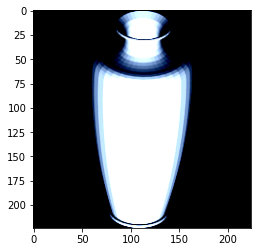

In [183]:
import torch
from hparams import HyperParameter
from model.network import BackboneNetwork
from modelnet40 import ModelNet40AtlasNet
import matplotlib.pyplot as plt
import open3d

ATLAS_TEST = ModelNet40AtlasNet("train", shuffle=False, pcd_normalization="UnitBall",  
                                img_normalization=True, inference= True, mvcnn=True, num_point=2000)

hparams = HyperParameter()
hparams.load('pretrained/model_e_mvcnn_svr.yaml')

model = BackboneNetwork(hparams)
print("Loading Model ...")
model.load_state_dict(torch.load('pretrained/model_e_mvcnn_svr.ckpt'))
print("Model loaded.")
model = model.to(hparams.device)
model.eval()

classnames=['airplane','bathtub','bed','bench','bookshelf','bottle','bowl','car','chair',
                    'cone','cup','curtain','desk','door','dresser','flower_pot','glass_box',
                    'guitar','keyboard','lamp','laptop','mantel','monitor','night_stand',
                    'person','piano','plant','radio','range_hood','sink','sofa','stairs',
                    'stool','table','tent','toilet','tv_stand','vase','wardrobe','xbox']
#8222
index = 9230
save = False
visualization = True
classification = True

sample = ATLAS_TEST[index]
print("Ground Truth PCD path: ", sample['pcd_filename'])
print("Ground Truth IMG path: ", sample['img_filename'])

img = sample['rendering']
gt_pcd = sample['pointcloud']
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

input = sample['rendering'].unsqueeze(0).float().to(hparams.device)

if classification:
    imgs, label = sample['all_renderings'], sample['class']
    tmp = torch.max(model.class_inference(imgs, mvcnn= True), 1)[1]
    gt_label, pred_label = label, classnames[int(tmp)]
    print("Label:", gt_label, " Inference:", pred_label)
    if gt_label == pred_label:
        print("Good inference.")
    else:
        print("Bad inference.")

pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(model(input).detach().numpy()[0][0].transpose())

mesh = model.generate_mesh(input)
if visualization:
    mesh.compute_vertex_normals()
    open3d.visualization.draw_geometries([ pcd,  ])

if save:
    open3d.io.write_point_cloud(f"inference/inference_{index}.pcd", pcd, \
                                write_ascii=True, print_progress=True)
    open3d.io.write_triangle_mesh(f"inference/inference_{index}.obj", mesh, \
                                write_ascii=True, print_progress=True)